# Coordenadas homogéneas

Primeros pasos con puntos y rectas del plano, usando [coordenadas homogéneas](https://en.wikipedia.org/wiki/Homogeneous_coordinates) (wikipedia):

> In mathematics, homogeneous coordinates or projective coordinates, introduced by August Ferdinand Möbius in his 1827 work Der barycentrische Calcül,[1][2] are a system of coordinates used in projective geometry, as Cartesian coordinates are used in Euclidean geometry. They have the advantage that the coordinates of points, including points at infinity, can be represented using finite coordinates. Formulas involving homogeneous coordinates are often simpler and more symmetric than their Cartesian counterparts. Homogeneous coordinates have a range of applications, including computer graphics and 3D computer vision, where they allow affine transformations and, in general, projective transformations to be easily represented by a matrix. 

## Resumen teórico informal

### Espacio vectorial

Es un conjunto cuyos elementos se pueden expresar como **combinación lineal** de algunos de ellos, la **base** de representación, elegida por conveniencia. Los coeficientes de la combinación son las **coordenadas** del elemento en esa base.

$$ \vec{x} = x_1 \vec{e}^1 + x_2 \vec{e}^2 + \ldots x_n \vec{e}^n  = \begin{bmatrix}\vec{e}^1 & \vec{e}^2 & \ldots&\vec{e}^1\end{bmatrix} \begin{bmatrix}x_1\\x_2\\\vdots\\x_n\end{bmatrix} = E\; \boldsymbol x$$

Normalmente identificamos el vector $\vec{x}$ con la tupla de coordenadas $\boldsymbol{x}$, dando por supuesta la base.

### Transformaciones lineales

Son las más naturales para operar con espacios vectoriales. La transformación de una combinación lineal es una combinación lineal de transformaciones:

$$T(a \boldsymbol x + b \boldsymbol y) = a T(\boldsymbol x) + b T(\boldsymbol y)$$

Por tanto, una transformación lineal queda completamente definida por su acción sobre la base.

Las coordenadas del resultado son combinaciones lineales de coordenadas de la entrada: solo involucran multiplicaciones por constantes y sumas. La transformación se puede representar mediante una **matriz de coeficientes**.

La implementación de la **aplicación** de la transformación a un vector es un producto matriz-vector. La **composición** de transformaciones da lugar a un producto de matrices.

Si conseguimos reformular un problema mediante espacios vectoriales y transformaciones lineales daremos un paso muy importante hacia su resolución, al disponer de las potentes herramientas de álgebra lineal.

[El cambio de base es una transformación lineal.]: vale

Algunas transformaciones geométricas como los cambios de escala y la rotaciones respecto al origen son lineales cuando utilizamos coordenadas cartesianas. Pero los desplazamientos no lo son (y por tanto tampoco las rotaciones o escalados respecto a puntos arbitrarios), ni la transformación de perspectiva, en la que aparece una división de coordenadas. 
Estas transformaciones son la base de la geometría visual. Como veremos en el notebook siguiente, por suerte todas ellas son lineales cuando usamos coordenadas homogéneas.

Antes vamos a familiarizarnos con este tipo coordenadas y con algunas operaciones que se facilitan mucho con ellas.

### Producto escalar

Los vectores, sin más, son entes abstractos. Es mejor trabajar en un espacio euclídeo, donde los vectores tienen tamaño y podemos medir distancias y ángulos entre ellos. Esto se consigue cuando el espacio tiene una **métrica**, dada por una función (bi)lineal que acepta dos vectores y produce un número que indica el grado de alineamiento entre ellos (**inner product**). Con ella podemos definir el módulo de un vector y con ello distancias y ángulos.

$$\vec u \cdot \vec v = u_1v_1 + u_2v_2 \in \mathbb R $$

$$\left\lVert u\right\rVert^2 = \vec u \cdot \vec u$$

$$cos 
\angle (\vec{u}, \vec{v}) = \frac{\vec u \cdot \vec v }{ \left\lVert u\right\rVert \left\lVert v\right\rVert} $$

(Las dos fórmulas anteriores son válidas en espacios de cualquier dimensión.)

Los vectores se pueden identificar con matrices columna, por tanto el producto escalar se puede expresar con el operador punto (*dot product*) o como un producto de matrices fila y columna:

$$ \vec u \cdot \vec v = \vec u^\mathsf T \vec v$$

Algunas transformaciones del espacio, como por ejemplo una rotación, dejan la métrica invariante: ni la longitud de un vector ni el ángulo entre dos vectores cambian tras sufrir una rotación. Pero otras, como la transformación de perspectiva, sí cambian la métrica. De alguna manera, cuando vemos el espacio (o un plano, como por ejemplo un campo de deporte) proyectado en una imagen, la métrica se pierde y las medidas en la imagen no corresponden con las medidas del plano real. Pero en realidad la métrica no se ha perdido del todo. Con un poco de suerte encontraremos pistas en la imagen que permitan recuperarla.

### Producto vectorial

El producto vectorial (*[cross product](https://en.wikipedia.org/wiki/Cross_product)*) de dos vectores $\vec u$ y  $\vec v$  de $\mathbb R^3$ produce un vector $\vec w = \vec u \times \vec v$  perpendicular a ambos, cuyo módulo es el área del paralelogramo definido por $\vec u$ y $\vec v$, y su dirección viene dada por la regla de la mano derecha.

El producto vectorial se utiliza mucho en Física. Nosotros lo utilizaremos como una herramienta muy útil para ciertas operaciones geométricas.

El producto escalar "responde" (o "detecta") vectores alineados, mientras que el producto vectorial lo hace a vectores perpendiculares. Y viceversa: si $\vec u$ y  $\vec v$ son perpendiculares $\vec u \cdot \vec v = 0$, y si $\vec u$ y  $\vec v$ son paralelos (proporcionales,  $\vec u = \alpha\vec v$), entonces  $\vec u \times \vec v = (0,0,0)$.

Los operadores "dot" ($\cdot$) y "cross" ($\times$) serán nuestras herramientas básicas.

### Coordenadas homogéneas

Las coordenadas homogéneas son una "ampliación" de las coordenadas cartesianas.

De forma no muy rigurosa, vamos a asociar los puntos del plano con el espacio vectorial $\mathbb R^2$. Los elementos se especifican con dos coordenadas $p=(x,y)$.

Las coordenadas homogéneas de este punto $p$ son las mismas $x$ e $y$, a las que simplemente **añadimos un uno**: $(x,y,1)$. Y además, podemos multiplicar a los tres elementos de esta tripleta por un factor $\lambda$ cualquiera, distinto de cero.

$$(x,y) \rightarrow \lambda(x,y,1) $$

Ejemplo: el punto de coordenadas cartesianas $(2,-3)$ tiene coordenadas homogéneas $(2,-3,1)$. Si multiplicamos por $5$ tenemos $(10,-15,5)$, que son otras coordenadas homogéneas equivalentes del mismo punto. Si multiplicamos por $-0.5$ tenemos otra posible tripleta  $(-1, 1.5, -0.5)$  de coordenadas homogéneas del punto $(2,-3)$. A un punto le corresponde una sola 2-tupla de coordenadas cartesianas, pero infinitas tripletas de coordenadas homogéneas.

Podemos recuperar las coordenadas cartesianas a partir de las coordenadas homogéneas. Solo hay que dividir por la tercera componente:

$$(x,y,w) \rightarrow \left(\frac{x}{w}, \frac{y}{w} \right)$$

Esta operación elimina el posible factor $\lambda$, elimina la "homogeneidad". El término "homogéneo" significa que el objeto matemático (vector, matriz) tiene un factor de escala arbitrario.

Cada punto del plano $\mathbb R^2$ se representa con un subespacio vectorial de $\mathbb R^3$: todos los puntos de la recta que une el punto $(x,y,1)$ y el origen (0,0,0). El conjunto de todos esos puntos se llama "rayo". El conjunto de todos los rayos (subespacios vectoriales) es $\mathbb P^2$, el plano proyectivo.

¿Qué ventajas tiene trabajar con coordenadas homogéneas?. Hay muchas. La primera es que las transformaciones geométricas que nos interesan se convierten en transformaciones lineales (matrices). La segunda es que en el plano proyectivo aparecen nuevos puntos de gran importancia en la geometría visual. Son puntos $(x,y,0)$ que no tienen su correspondiente punto cartesiano, pero que pueden aparecer como resultado de operaciones geométricas. Son puntos "ideales", o "del infinito", en cada dirección. Como veremos a continuación podemos operar con ellos sin problemas computacionales de ningún tipo (usando coordenadas cartesianas hay ciertas operaciones que producen divisiones por cero). Las bibliotecas gráficas y las tarjetas aceleradoras admiten de forma natural coordenadas homogéneas.

El proceso es el mismo en 3D. El espacio cartesiano $\mathbb R^3$ tiene su correspondiente espacio proyectivo $\mathbb P^3$.

### Puntos y rectas

La ecuación de una recta de la forma $y=mx+b$ no vale para rectas verticales. Es mejor usar la forma implícita

$$ax+by+c=0$$

que puede intepretarse como 

$$l \cdot p =0$$

donde $l=(a,b,c)$ y $p=(x,y,1)$ son las coordenadas homogéneas de la recta y el punto respectivamente.

Cuando $l\cdot p = 0$ decimos que la recta $l$ pasa por el punto $p$, o que el punto $p$ está en la recta $l$. El punto y la recta del plano son objetos duales. Ambos se representan con una tripleta homogénea. (Viendo simplemente los 3 números no podemos saber si se refieren a un punto o una recta.)

Hay dos operaciones fundamentales que involucran a los puntos y las rectas del plano:

1) Calcular la recta $l$ que pasa por dos puntos $p$ y $q$.

Esto se puede hacer fácilmente resolviendo un sistema de ecuaciones (hay otras formas). Pero hay una forma de hacerlo que es todavía más simple, aprovechando la operación de producto vectorial. Usando coordenadas homogéneas:

$$l = p \times q$$

Es fácil ver que esta recta $l$, vista como un vector de $\mathbb R^3$, será perpendicular a los dos vectores de $\mathbb R^3$ que contienen las coordenadas homogéneas de $p$ y $q$. Por tanto, $l\cdot p = l\cdot q  = 0$. Ambos puntos verifican la ecuación de la recta.

2) Calcular el punto $p$ de intersección de dos rectas $l$ y $m$.

Esto también se resuelve con un sistema de ecuaciones. Pero, de nuevo, el producto vectorial ofrece un método directo:

$$p = l \times m$$

Como vectores de $\mathbb R^3$, $p$ será perpendicular a $l$ y $m$, por lo que $l \cdot p = m \cdot p = 0$. El punto está en las dos rectas.

Si intentamos calcular la intersección de dos rectas paralelas mediante el método tradicional, con coordenadas cartesianas, encontramos que el determinante del sistema de ecuaciones es cero. Solo hay una ecuación independiente, y por tanto el problema no tiene solución.

Pero la operación de producto vectorial de coordenadas homogéneas produce un punto perfectamente válido también en este caso. La tercera coordenada homogénea será cero, lo que significa que es un punto ideal, que está infinitamente alejado (en la dirección de las dos rectas paralelas). Podemos continuar operando tranquilamente con él. Veremos un ejemplo de esto dentro de un momento.

## Experimentos

En primer lugar preparamos unas utilidades para dibujar puntos y rectas.

In [1]:
import numpy as np
import numpy.linalg as la
import cv2   as cv

import matplotlib.pyplot as plt

%matplotlib inline

def fig(w,h):
    plt.figure(figsize=(w,h))

def readrgb(file):
    return cv.cvtColor( cv.imread('../images/'+file), cv.COLOR_BGR2RGB) 

# muestra un polígono cuyos nodos son las filas de un array 2D
def shcont(c, color='blue', nodes=True):
    x = c[:,0]
    y = c[:,1]
    x = np.append(x,x[0])
    y = np.append(y,y[0])
    plt.plot(x,y,color)
    if nodes: plt.plot(x,y,'.',color=color, markersize=11)

# muestra un punto cartesiano
def shpoint(p, color='blue'):
    plt.plot(p[0],p[1],'.',color=color, markersize=15)        
        
# dibuja una recta "infinita"
def shline(l,xmin=-2000,xmax=2000, color='red'):
    a,b,c = l / la.norm(l)
    if abs(b) < 1e-6:
        x = -c/a
        r = np.array([[x,-2000],[x,2000]])
    else:
        y0 = (-a*xmin - c) / b
        y1 = (-a*xmax - c) / b
        r = np.array([[xmin,y0],[xmax,y1]])
    shcont(r,color=color,nodes=False)

Funciones para convertir coordenadas cartesianas en homoǵeneas y viceversa:

In [2]:
# convierte un conjunto de puntos ordinarios (almacenados como filas de la matriz de entrada)
# en coordenas homogéneas (añadimos una columna de 1)
def homog(x):
    ax = np.array(x)
    uc = np.ones(ax.shape[:-1]+(1,))
    return np.append(ax,uc,axis=-1)


# convierte en coordenadas tradicionales
def inhomog(x):
    ax = np.array(x)
    return ax[..., :-1] / ax[...,[-1]]

Producto vectorial.

In [3]:
# Está disponible en numpy, pero es conveniente
# normalizar el resultado para que las coordenadas
# no crezcan cada vez más al hacer varias operaciones.
def cross(u,v):
    r = np.cross(u,v)
    return r / la.norm(r)

Veamos algunos ejemplos de uso.

La función `homog` admite vectores individuales de cualquier dimensión (no hace falta que sean np.array).

In [4]:
homog( (1,2) )

array([1., 2., 1.])

La función `inhomog` produce el resultado inverso, recupera las coordenadas cartesianas a partir de las homogéneas.

In [5]:
inhomog([6,4,2])

array([3., 2.])

Es más frecuente convertir un conjunto de puntos a la vez.

In [6]:
homog([( 1,2),
       ( 4,4),
       (-3,3)])

array([[ 1.,  2.,  1.],
       [ 4.,  4.,  1.],
       [-3.,  3.,  1.]])

In [7]:
inhomog([(1,2,5),
         (4,4,2)])

array([[0.2, 0.4],
       [2. , 2. ]])

Multiplicar por un factor cualquiera las coordenadas homogéneas no afecta a las cartesianas:

In [8]:
inhomog(3*homog([[1,2],
                 [4,4]]))

array([[1., 2.],
       [4., 4.]])

El paso siguiente es practicar con las operaciones de "unión" e "intersección" de puntos y rectas con coordenadas homogéneas.

En primer lugar calculamos la recta que pasa por dos puntos.

p=[1. 2. 1.]
q=[4. 4. 1.]
l=[-2.  3. -4.]


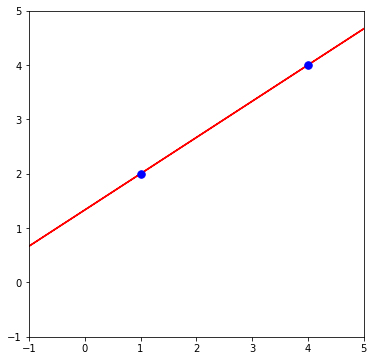

In [9]:
p, q = homog([(1,2),
              (4,4)])
print(f'p={p}')
print(f'q={q}')

l = np.cross(p,q)

print(f'l={l}')

fig(6,6); plt.axis([-1,5,-1,5]);
shline(l)
shpoint(p)
shpoint(q)

A continuación calculamos el punto de intersección de dos rectas.

p=[ 9 10  3]


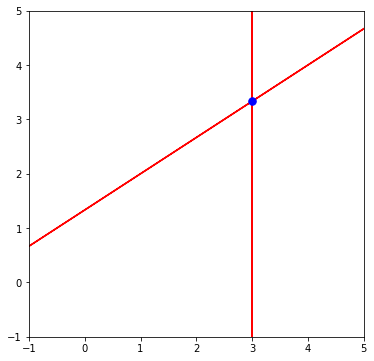

In [10]:
l = (2,-3,4)
m = (1,0,-3)

p = np.cross(l,m)

print(f'p={p}')

fig(6,6); plt.axis([-1,5,-1,5]);
shline(l)
shline(m)
shpoint(inhomog(p))

Observa que hemos impreso las coordenadas homogeneas de $p$, aunque para dibujarlo lo pasamos a cartesianas. La recta $m$ es vertical, por lo que no se podría usar la representación $y=ax+b$.

La intersección de rectas paralelas da un punto en el infinito.

[15 10  0]


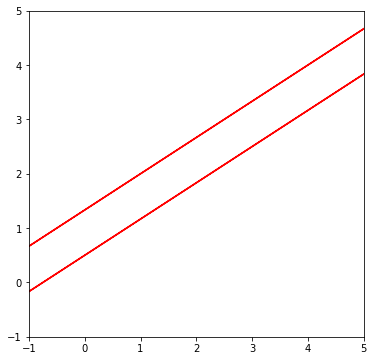

In [11]:
l = (2,-3,4)
m = (4,-6,3)

p = np.cross(l,m)
print(p)

fig(6,6); plt.axis([-1,5,-1,5]);
shline(l)
shline(m)

Se puede seguir trabajando tranquilamente con él. Por ejemplo, no hay problema en calcular la recta que pasa por un punto normal $(1,2)$ y otro en el infinito en la dirección diagonal $(1,1,0)$:

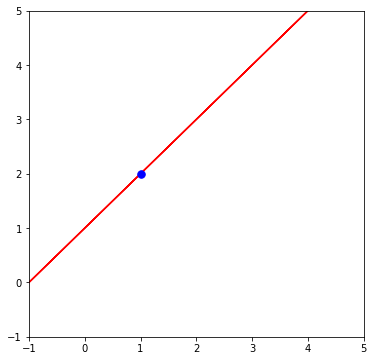

In [12]:
fig(6,6); plt.axis([-1,5,-1,5]);

shline(cross((1,2,1),(1,1,0)))
shpoint((1,2))

### Horizonte de un plano a partir de la imagen de un rectángulo

El horizonte de un plano es una recta que contiene la imagen de los puntos que están infinitamente alejados en el plano original. Aunque no se vea directamente en la imagen, su posición puede deducirse porque contiene los puntos de fuga de rectas paralelas.

Si vemos un rectángulo tenemos dos juegos de rectas en la imagen que sabemos que son paralelas en el mundo real. Esto permite encontrar el horizonte del plano en el que está dicho rectángulo.

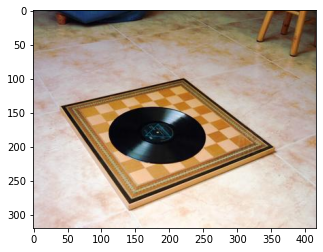

In [13]:
img = readrgb('disk1.jpg')

plt.imshow(img);

En este caso los vértices del rectángulo se han tomado a mano y a ojo. (En realidad en esa imagen tenemos un cuadrado, que aporta más información, pero eso no lo usamos en este ejercicio).

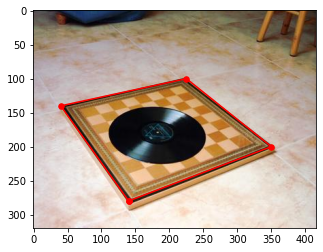

In [14]:
ref = np.array([
        [140,280],
        [40,140],
        [225,100],
        [350,200]])

plt.imshow(img);
shcont(ref,color='red')

Pasamos a homogéneas:

In [15]:
r0,r1,r2,r3 = href = homog(ref)
href

array([[140., 280.,   1.],
       [ 40., 140.,   1.],
       [225., 100.,   1.],
       [350., 200.,   1.]])

Mediante el producto vectorial calculamos las 4 rectas que unen los vértices, formando los lados del cuadrado, y con las dos intersecciones obtenemos dos puntos del horizonte, que finalmente unimos.

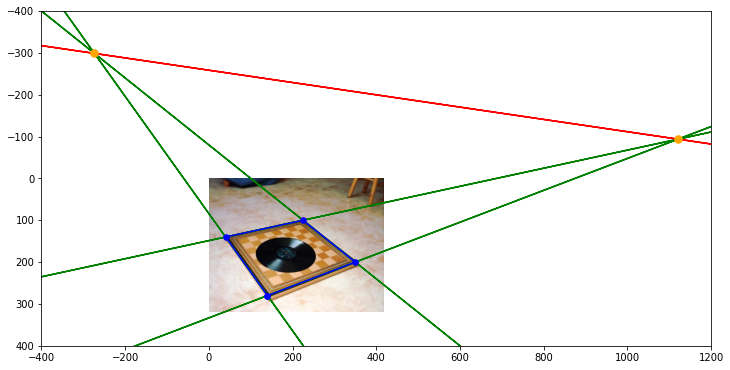

In [16]:
l1 = cross(r1,r2)
l2 = cross(r0,r3)

l3 = cross(r0,r1)
l4 = cross(r2,r3)

ph = cross(l1,l2)
qh = cross(l3,l4)

p = inhomog(ph)
q = inhomog(qh)

horiz = cross(ph,qh)

fig(12,12)
plt.imshow(img)

shline(l1,color='green')
shline(l2,color='green')
shline(l3,color='green')
shline(l4,color='green')
shline(horiz,color='red')
shcont(ref);
shpoint(p,color='orange')
shpoint(q,color='orange')

plt.axis([-400,1200,400,-400]);

Por supuesto, lo ideal sería detectar automáticamente los vértices del rectángulo y mostrar el resultado en vivo con la webcam. Esto lo haremos en la sesión práctica.

En una vista frontal de un rectángulo los puntos de fuga están en el infinito y el horizonte no se puede dibujar, pero la ecuación de la recta se calcula bien:

In [17]:
ref = np.array([
        [0,0],
        [0,1],
        [2,1],
        [2,0]])

href = homog(ref)

l1 = cross(href[1,:],href[2,:])
l2 = cross(href[0,:],href[3,:])

l3 = cross(href[0,:],href[1,:])
l4 = cross(href[2,:],href[3,:])

ph = cross(l1,l2)
qh = cross(l3,l4)

horiz = cross(ph,qh)

print(horiz)

[ 0.  0. -1.]


Esta recta se llama $l_\infty$ y contiene a todos los puntos $(x,y,0)$ ideales ("infinitamente alejados").

### Centro de un círculo definido por 3 puntos

Ejercicio: define una función para obtener el centro de un círculo dados 3 puntos en la circunferencia. Intenta utilizar las operaciones de unión de puntos e intersección de rectas basadas en el producto vectorial.